In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot

In [48]:
df = pd.read_csv("D:\Study\BA\TEST\BankChurners.csv")

In [49]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [50]:
df = df.iloc[:, :-2]

In [51]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [53]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<AxesSubplot:>

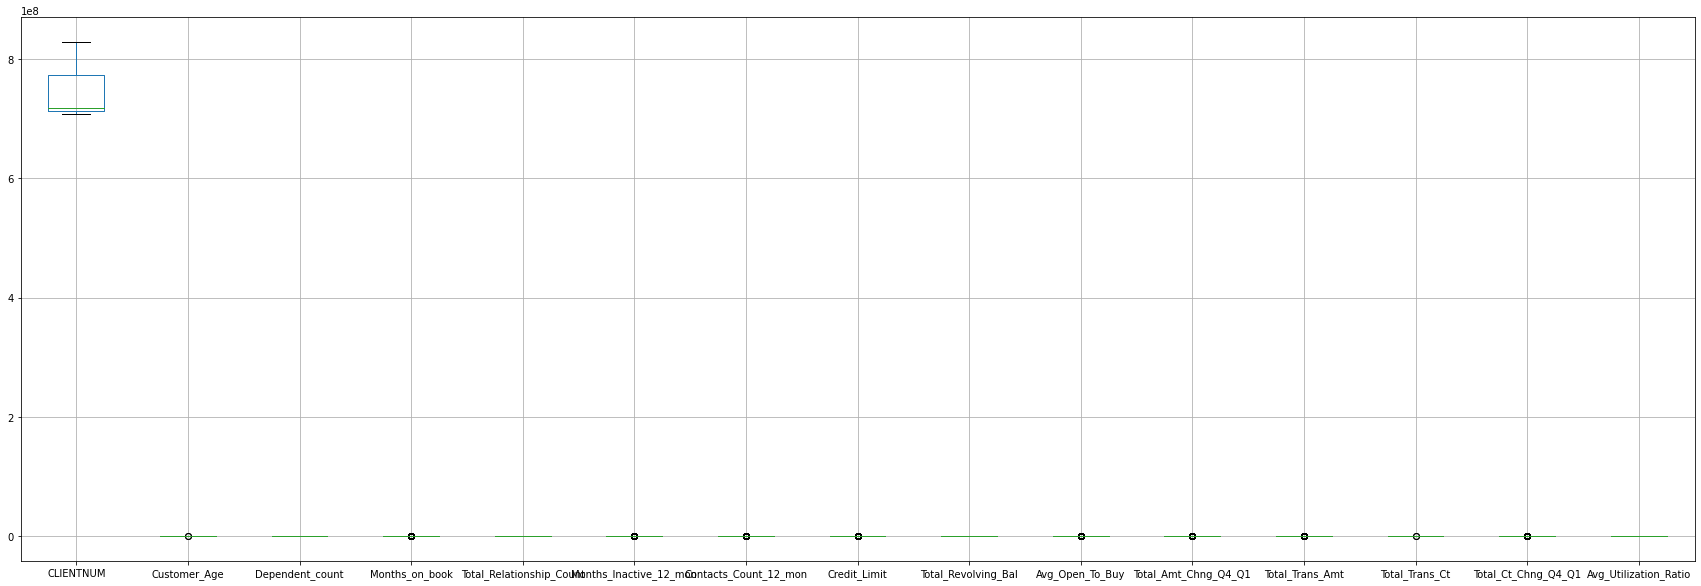

In [54]:
df.boxplot(figsize=(30,10))

<AxesSubplot:>

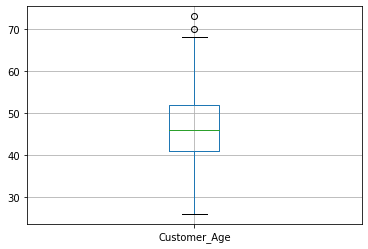

In [55]:
df.boxplot('Customer_Age')

<AxesSubplot:>

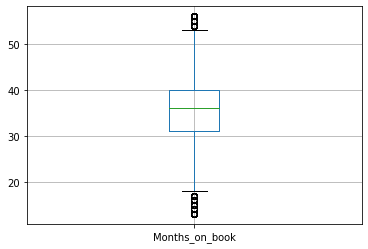

In [56]:
min=df['Customer_Age'].quantile(0.05)
max=df['Customer_Age'].quantile(0.95)
new=np.where(df['Customer_Age']<min,min,df['Customer_Age'])
df['Customer_Age']=new
new=np.where(df['Customer_Age']>max,max,df['Customer_Age'])
df['Customer_Age']=new
df.boxplot('Months_on_book')

<AxesSubplot:>

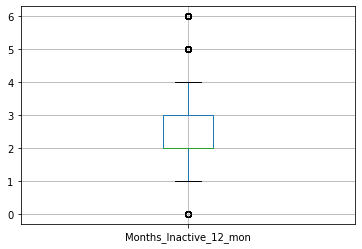

In [57]:
min=df['Months_on_book'].quantile(0.05)
max=df['Months_on_book'].quantile(0.95)
new=np.where(df['Months_on_book']<min,min,df['Months_on_book'])
df['Months_on_book']=new
new=np.where(df['Months_on_book']>max,max,df['Months_on_book'])
df['Months_on_book']=new
df.boxplot('Months_Inactive_12_mon')

<AxesSubplot:>

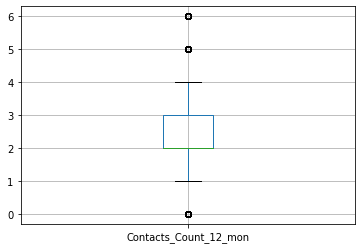

In [58]:
min=df['Months_Inactive_12_mon'].quantile(0.05)
max=df['Months_Inactive_12_mon'].quantile(0.95)
new=np.where(df['Months_Inactive_12_mon']<min,min,df['Months_Inactive_12_mon'])
df['Months_Inactive_12_mon']=new
new=np.where(df['Months_Inactive_12_mon']>max,max,df['Months_Inactive_12_mon'])
df['Months_Inactive_12_mon']=new
df.boxplot('Contacts_Count_12_mon')

<AxesSubplot:>

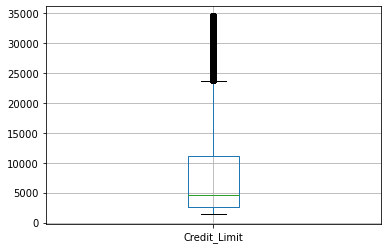

In [59]:
min=df['Contacts_Count_12_mon'].quantile(0.05)
max=df['Contacts_Count_12_mon'].quantile(0.95)
new=np.where(df['Contacts_Count_12_mon']<min,min,df['Contacts_Count_12_mon'])
df['Contacts_Count_12_mon']=new
new=np.where(df['Contacts_Count_12_mon']>max,max,df['Contacts_Count_12_mon'])
df['Contacts_Count_12_mon']=new
df.boxplot('Credit_Limit')

<AxesSubplot:>

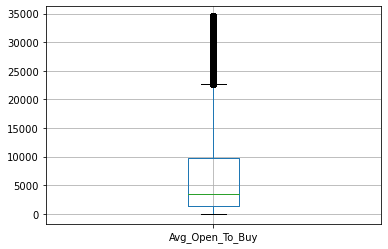

In [60]:
min=df['Credit_Limit'].quantile(0.05)
max=df['Credit_Limit'].quantile(0.90)
new=np.where(df['Credit_Limit']<min,min,df['Credit_Limit'])
df['Credit_Limit']=new
new=np.where(df['Credit_Limit']>max,max,df['Credit_Limit'])
df['Credit_Limit']=new
df.boxplot('Avg_Open_To_Buy')

<AxesSubplot:>

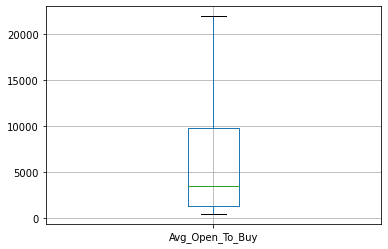

In [61]:
min=df['Avg_Open_To_Buy'].quantile(0.05)
max=df['Avg_Open_To_Buy'].quantile(0.90)
new=np.where(df['Avg_Open_To_Buy']<min,min,df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy']=new
new=np.where(df['Avg_Open_To_Buy']>max,max,df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy']=new
df.boxplot('Avg_Open_To_Buy')

<AxesSubplot:>

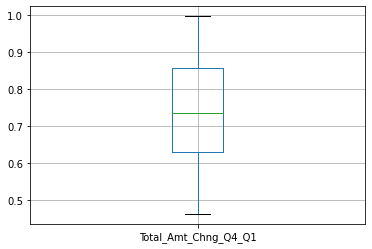

In [62]:
min=df['Total_Amt_Chng_Q4_Q1'].quantile(0.05)
max=df['Total_Amt_Chng_Q4_Q1'].quantile(0.90)
new=np.where(df['Total_Amt_Chng_Q4_Q1']<min,min,df['Total_Amt_Chng_Q4_Q1'])
df['Total_Amt_Chng_Q4_Q1']=new
new=np.where(df['Total_Amt_Chng_Q4_Q1']>max,max,df['Total_Amt_Chng_Q4_Q1'])
df['Total_Amt_Chng_Q4_Q1']=new
df.boxplot('Total_Amt_Chng_Q4_Q1')

<AxesSubplot:>

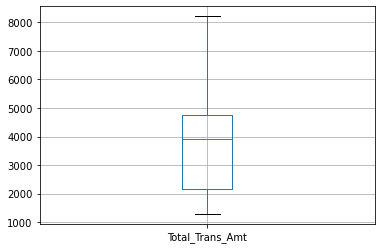

In [63]:
min=df['Total_Trans_Amt'].quantile(0.05)
max=df['Total_Trans_Amt'].quantile(0.90)
new=np.where(df['Total_Trans_Amt']<min,min,df['Total_Trans_Amt'])
df['Total_Trans_Amt']=new
new=np.where(df['Total_Trans_Amt']>max,max,df['Total_Trans_Amt'])
df['Total_Trans_Amt']=new
df.boxplot('Total_Trans_Amt')

<AxesSubplot:>

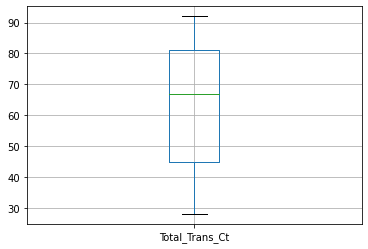

In [64]:
min=df['Total_Trans_Ct'].quantile(0.05)
max=df['Total_Trans_Ct'].quantile(0.90)
new=np.where(df['Total_Trans_Ct']<min,min,df['Total_Trans_Ct'])
df['Total_Trans_Ct']=new
new=np.where(df['Total_Trans_Ct']>max,max,df['Total_Trans_Ct'])
df['Total_Trans_Ct']=new
df.boxplot('Total_Trans_Ct')

<AxesSubplot:>

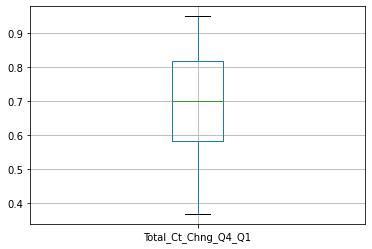

In [65]:
min=df['Total_Ct_Chng_Q4_Q1'].quantile(0.05)
max=df['Total_Ct_Chng_Q4_Q1'].quantile(0.90)
new=np.where(df['Total_Ct_Chng_Q4_Q1']<min,min,df['Total_Ct_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1']=new
new=np.where(df['Total_Ct_Chng_Q4_Q1']>max,max,df['Total_Ct_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1']=new
df.boxplot('Total_Ct_Chng_Q4_Q1')

<AxesSubplot:>

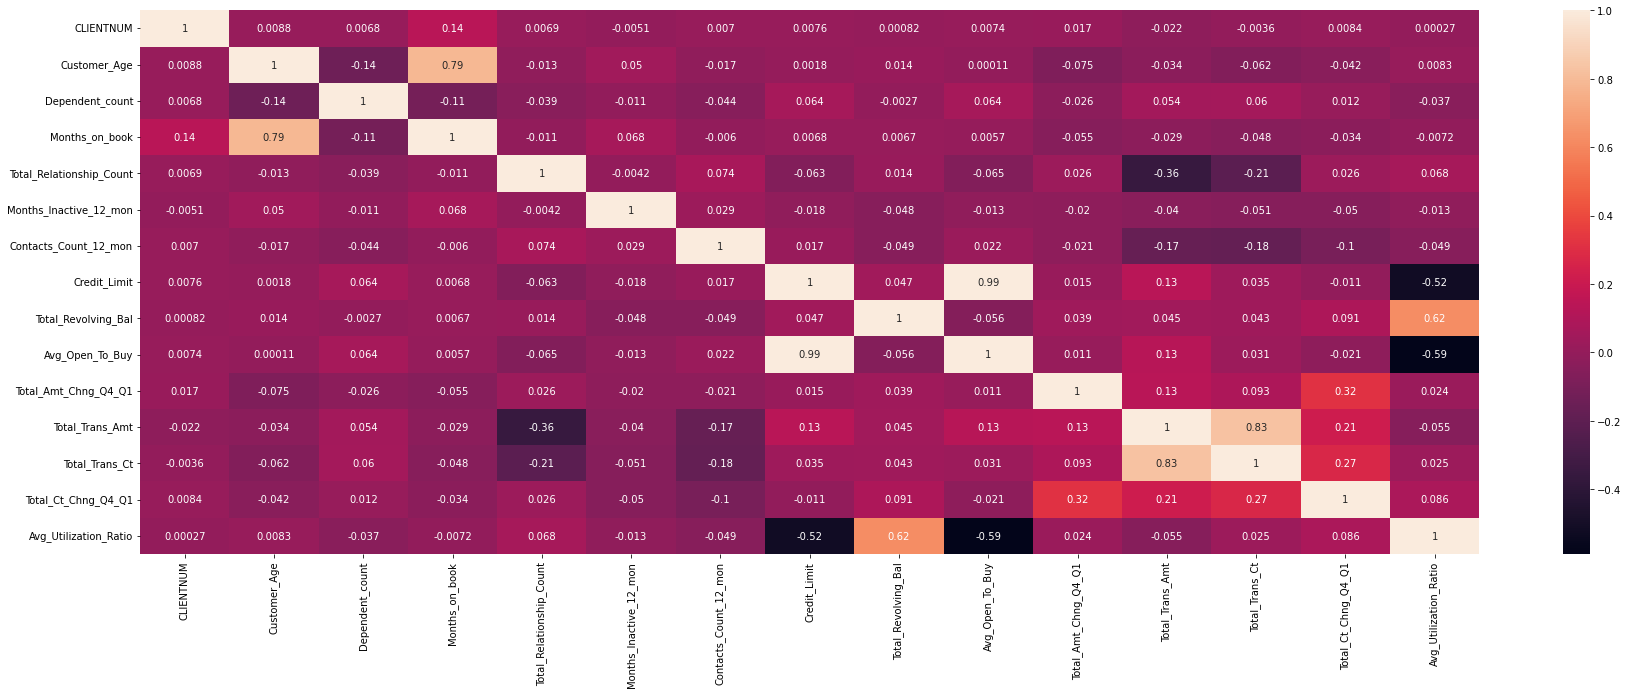

In [66]:
corr = df.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(corr,annot=True)

In [67]:
df = df.drop('CLIENTNUM',axis=1)

In [68]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [69]:
df.Attrition_Flag=pd.Series(np.where(df.Attrition_Flag=='Existing Customer',1,0),
           df.index)

In [70]:
df["Attrition_Flag"].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [72]:
df.select_dtypes(include="object").nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [73]:
df= pd.get_dummies(df,columns=["Gender"],drop_first=True)

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])

In [75]:
df.select_dtypes(include="object").nunique()

Series([], dtype: float64)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
y = df['Attrition_Flag']
x = df.drop(['Attrition_Flag'],axis=1)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [83]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7088, 19), (3039, 19), (7088,), (3039,))

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

D:\Program\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
final0 = lr.predict(x_test)
cm0 = confusion_matrix(y_test, final0)

In [94]:
cm0

array([[ 208,  265],
       [  95, 2471]], dtype=int64)

In [95]:
print(classification_report(y_test,final0))

              precision    recall  f1-score   support

           0       0.69      0.44      0.54       473
           1       0.90      0.96      0.93      2566

    accuracy                           0.88      3039
   macro avg       0.79      0.70      0.73      3039
weighted avg       0.87      0.88      0.87      3039



In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final0)

0.8815399802566634